In [1]:
## Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import time

## data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
## Load the merged data (see GETDATA notebook)
df2=pd.read_csv(r"NAME OF PATH", sep = ',', skipinitialspace = True)  # select your merged file here

In [3]:
df2.head

<bound method NDFrame.head of          ORDER_ID  PRODUCT_ID  ADD_TO_CART_ORDER  REORDERED  CUSTOMER_ID  \
0               2       33120                  1          1       202279   
1               2       28985                  2          1       202279   
2               2        9327                  3          0       202279   
3               2       45918                  4          1       202279   
4               2       30035                  5          0       202279   
...           ...         ...                ...        ...          ...   
6772636    855943       42450                  3          1       174676   
6772637    855943       48395                  4          1       174676   
6772638    855943       22198                  5          1       174676   
6772639    855943       34668                  6          1       174676   
6772640    855943       29987                  7          1       174676   

        EVAL_SET  ORDER_NUMBER  ORDER_DOW  ORDER_HOUR_OF_

In [4]:
## Total number of unique consumers / orders / products / categories 

print("instacart")
print(str(len(df2['CUSTOMER_ID'].unique())) +' customers')
print(str(len(df2['ORDER_ID'].unique())) +' orders')
print(str(len(df2['PRODUCT_ID'].unique())) +' products')
print(str(len(df2['HOOFDCATEGORIE'].unique())) +' main categories')


average_basket_size = df2.groupby('ORDER_ID')['PRODUCT_ID'].count().mean()  #calculate also non-unique products in order
min_basket_size = df2.groupby('ORDER_ID')['PRODUCT_ID'].count().min()
max_basket_size = df2.groupby('ORDER_ID')['PRODUCT_ID'].count().max()
print("Average basket size: " + str(average_basket_size))
print("Min basket size: " + str(min_basket_size))
print("Max basket size: " + str(max_basket_size))

average_basket_per_user = df2.groupby('CUSTOMER_ID')['ORDER_ID'].nunique().mean()
min_basket_per_user = df2.groupby('CUSTOMER_ID')['ORDER_ID'].nunique().min()
max_basket_per_user = df2.groupby('CUSTOMER_ID')['ORDER_ID'].nunique().max()
print("Average basket per user: " + str(average_basket_per_user))
print("Min basket per user: " + str(min_basket_per_user))
print("Max basket per user: " + str(max_basket_per_user))


instacart
89685 customers
603677 orders
41476 products
21 main categories
Average basket size: 11.218981342671661
Min basket size: 3
Max basket size: 137
Average basket per user: 6.73108100574232
Min basket per user: 3
Max basket per user: 41


In [5]:
# Number of products for the NUTRISCORE column
num_products = len(df2['NUTRISCORE'].dropna())
print("Number of products in the NUTRISCORE column: " + str(num_products))

# Number of unique products per each cell value in the NUTRISCORE column
products_per_value = df2.groupby('NUTRISCORE')['PRODUCT_ID'].nunique()
print("Number of unique products per cell value in the NUTRISCORE column:")
print(products_per_value)



Number of products in the NUTRISCORE column: 6772641
Number of unique products per cell value in the NUTRISCORE column:
NUTRISCORE
0    32330
1     3321
2     1273
3     1225
4     2073
5     1254
Name: PRODUCT_ID, dtype: int64


In [6]:
# Number of products for the ORGANIC column
num_products = len(df2['ORGANIC50'].dropna())
print("Number of products in the ORGANIC column: " + str(num_products))

# Number of unique products per each cell value in the ORGANIC column
products_per_value = df2.groupby('ORGANIC50')['PRODUCT_ID'].nunique()
print("Number of unique products per cell value in the ORGANIC column:")
print(products_per_value)



Number of products in the ORGANIC column: 6772641
Number of unique products per cell value in the ORGANIC column:
ORGANIC50
0    20702
1    20774
Name: PRODUCT_ID, dtype: int64


[Text(0.5, 0, 'Category'), Text(0, 0.5, 'Products Ordered')]

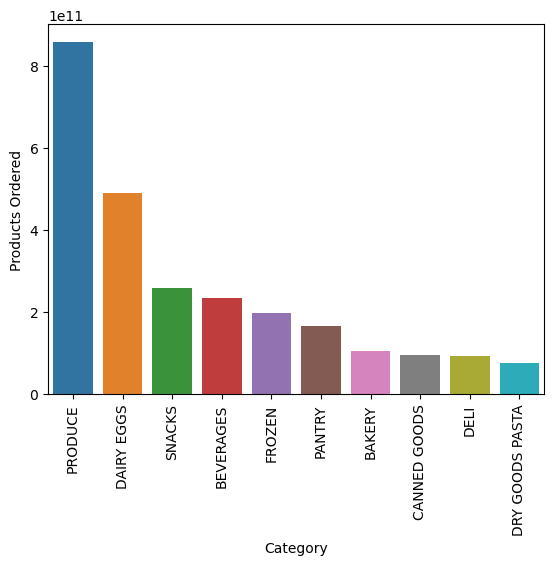

In [7]:
## Barplot
x = sns.barplot(data = df2.groupby('HOOFDCATEGORIE')['ORDER_ID'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'HOOFDCATEGORIE', y = 'ORDER_ID')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Category', ylabel = 'Products Ordered')

[Text(0.5, 0, 'Product Name'), Text(0, 0.5, 'Order')]

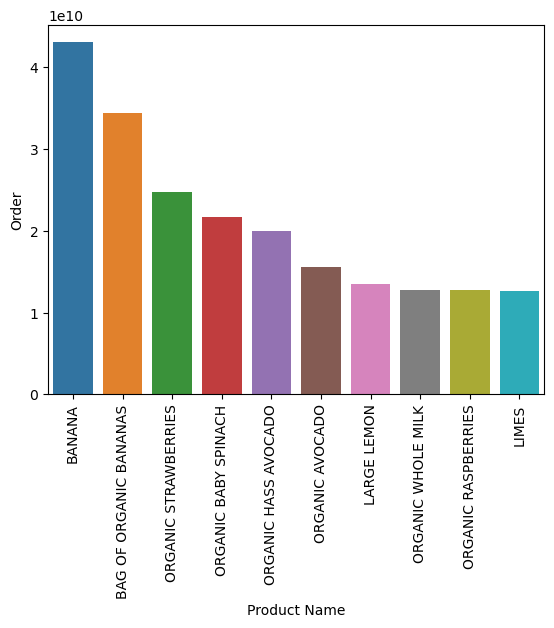

In [8]:
## most popular items in terms of products ordered
x = sns.barplot(data = df2.groupby('OMSCHRIJVING')['ORDER_ID'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'OMSCHRIJVING', y = 'ORDER_ID')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Product Name', ylabel = 'Order')

[Text(0.5, 0, 'Product Name'), Text(0, 0.5, 'Unit Share')]

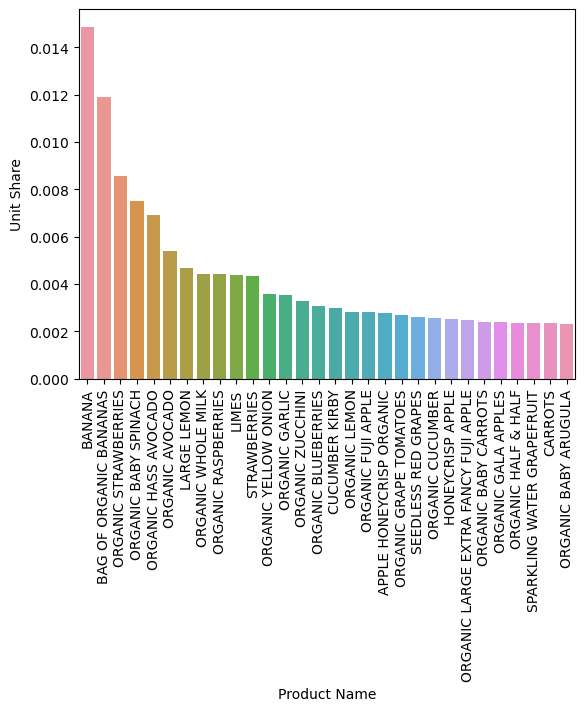

In [9]:
## create barchart showing share instead of units for top products
product_share = df2.groupby('OMSCHRIJVING')['ORDER_ID'].sum().reset_index()
product_share['product_share'] = product_share['ORDER_ID']
product_share['product_share'] = product_share['product_share'].apply(lambda x: x / product_share['ORDER_ID'].sum())

x = sns.barplot(data = product_share.sort_values(by = 'product_share',ascending = False)[0:30], x = 'OMSCHRIJVING', y = 'product_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Product Name', ylabel = 'Unit Share')

In [10]:
pd.set_option('display.min_rows',10000)
df2.groupby('OMSCHRIJVING')['ORDER_ID'].sum().sort_values(ascending = False)[0:100]

OMSCHRIJVING
BANANA                                                            43060610990
BAG OF ORGANIC BANANAS                                            34472776111
ORGANIC STRAWBERRIES                                              24807913577
ORGANIC BABY SPINACH                                              21715715199
ORGANIC HASS AVOCADO                                              20025776157
ORGANIC AVOCADO                                                   15583427348
LARGE LEMON                                                       13570195148
ORGANIC WHOLE MILK                                                12836499671
ORGANIC RASPBERRIES                                               12823797292
LIMES                                                             12704635048
STRAWBERRIES                                                      12552007908
ORGANIC YELLOW ONION                                              10432253584
ORGANIC GARLIC                                     

In [11]:
df2.head

<bound method NDFrame.head of          ORDER_ID  PRODUCT_ID  ADD_TO_CART_ORDER  REORDERED  CUSTOMER_ID  \
0               2       33120                  1          1       202279   
1               2       28985                  2          1       202279   
2               2        9327                  3          0       202279   
3               2       45918                  4          1       202279   
4               2       30035                  5          0       202279   
5               2       17794                  6          1       202279   
6               2       40141                  7          1       202279   
7               2        1819                  8          1       202279   
8               2       43668                  9          0       202279   
9               3       33754                  1          1       205970   
10              3       24838                  2          1       205970   
11              3       17704                  3          